In [1]:
# let's find how much area has good templates per filter after year 1

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
from rubin_scheduler.scheduler.utils import CurrentAreaMap, Footprint, make_rolling_footprints
from rubin_scheduler.utils import DEFAULT_NSIDE, SURVEY_START_MJD
from rubin_scheduler.site_models import Almanac
import sqlite3
import pandas as pd
from os.path import basename
from rubin_sim.data import get_baseline

import rubin_sim.maf_proto as maf


In [12]:
baseline_file = '../baseline/baseline_v5.0.1_10yrs.db'#'production_templates_y1_v5.0.1_10yrs.db'
run_name = basename(baseline_file).replace('.db', '')
con = sqlite3.connect(baseline_file)
# Dataframe is handy for some calcs
df = pd.read_sql("select * from observations where night < 365 and seeingFwhmEff < 1.3;", con)
# But mostly want numpy array for speed.
ge_array = df.to_records(index=False)
con.close()


In [13]:
nside = 64
sl = maf.Slicer(nside=nside)


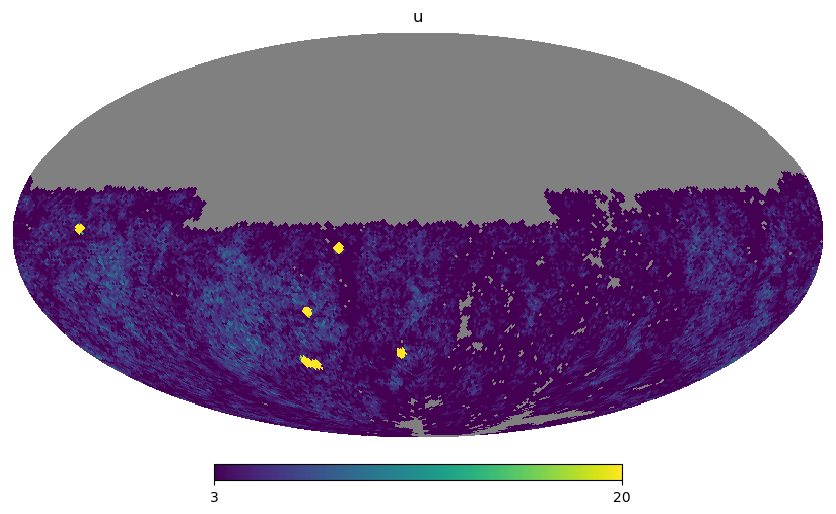

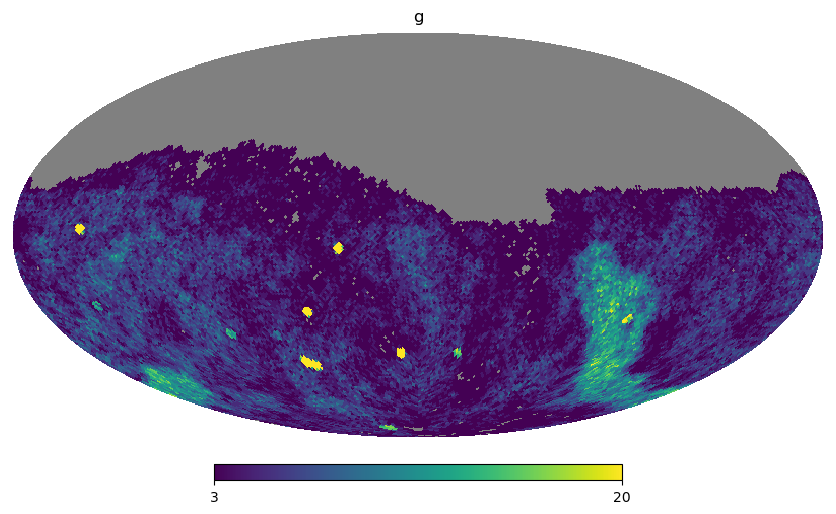

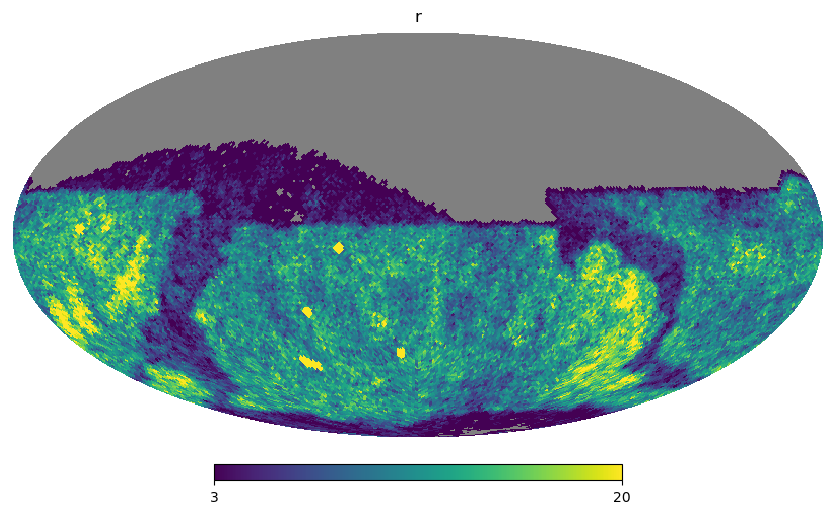

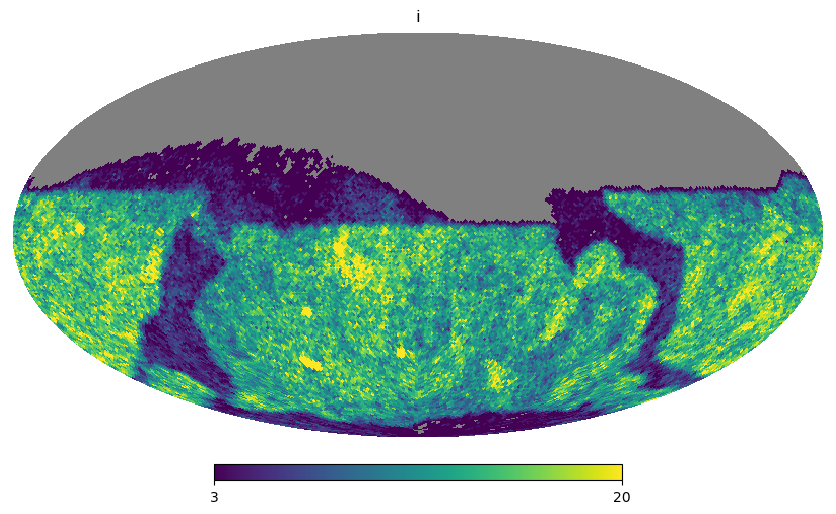

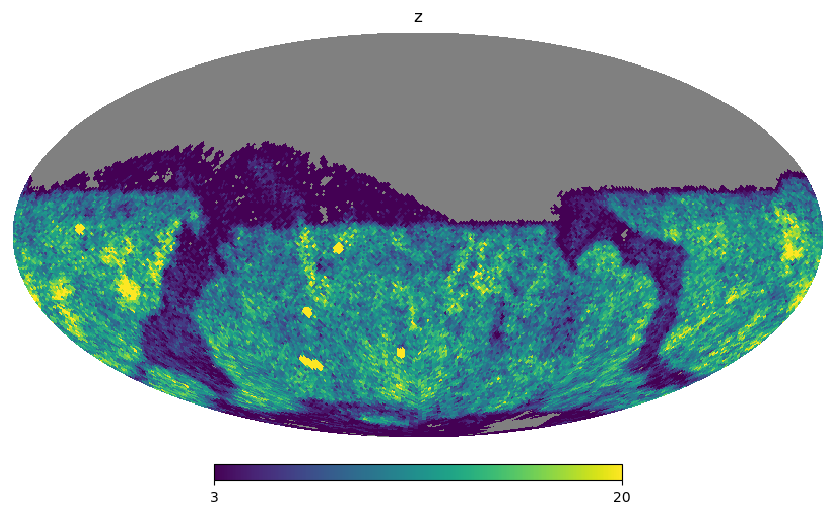

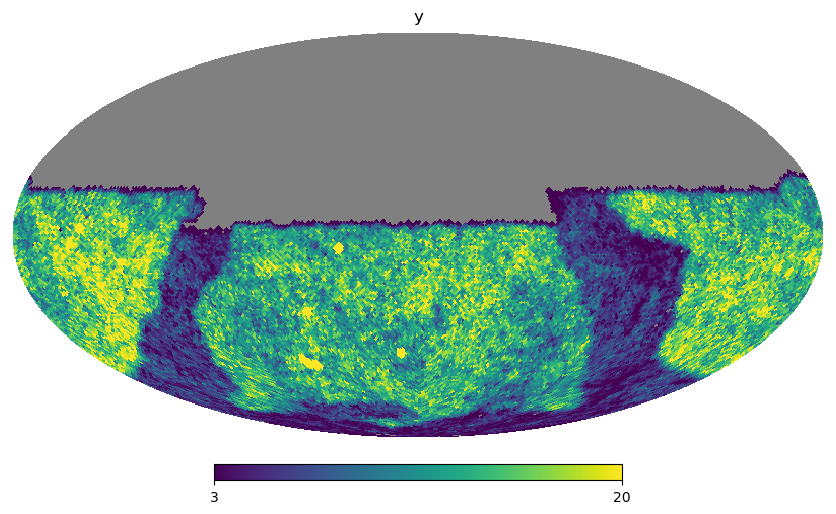

In [14]:
metric = maf.CountMetric()
npix = []
for bandname in 'ugrizy':
    indx = np.where(ge_array["band"] == bandname)
    ack = sl(ge_array[indx], metric)
    above = np.where(ack >= 4)[0]
    npix.append(above.size)
    hp.mollview(ack, title=bandname, min=3, max=20)

In [15]:
npix

[13920, 21421, 29577, 29423, 27980, 27954]

In [11]:
# From with template running
npix

[23629, 27635, 31698, 31868, 31943, 28693]